# Introduction

This project examines the correlation between student test scores and factors.It also focuses on analyzing data which helps in categorizing and thereby motivating the students in their academics as well as flavoring the staffs to improvise the students to the next level.

# Problem Statement

Analyzing student test scores alongside demographics (Gender, Ethnicity, Parental Education, Lunch preferences, and Test Preparation) using data mining techniques. 
                                                                                                                                Aim: Predict performance, identify teaching disparities, and support at-risk students through classification methods.

# Import Required Packages

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# DataFrame Loading and Overview

In [27]:
#Import the CSV Data as Pandas DataFrame
df = pd.read_csv("C:/Users/noorhan yaseen/student_result.csv")

In [28]:
#Show the top 5 Records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Shape of the dataset
df.shape

(1000, 8)

# Data Preprocessing

In [5]:
#Check Missing Values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [35]:
#Check Duplicates
df.duplicated().sum()

0

In [7]:
#check the null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#Check the Number of Unique Values in Each Column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# Exploring Data

In [9]:
#Categorical columns
print("Categories in 'gender' variable:  ",end=" ")
print(df["gender"].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df["test preparation course"].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [10]:
#numerical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "object"] 

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']


# Bivariate Analysis using bar chat

<Figure size 1000x800 with 0 Axes>

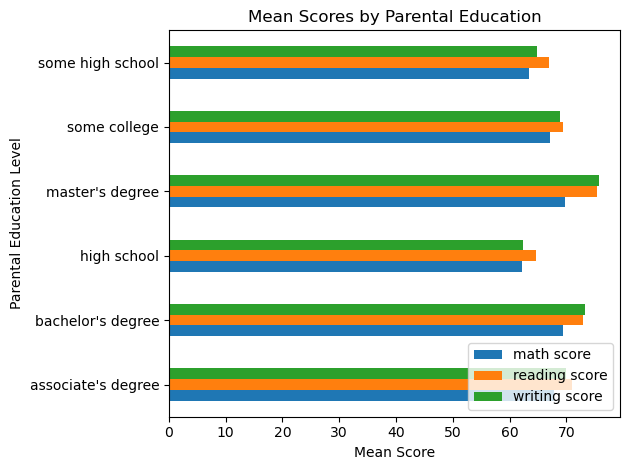

In [11]:
# Calculate mean values grouped by 'parental level of education'
grouped_data = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

# Plotting
plt.figure(figsize=(10, 8))
grouped_data.plot(kind='barh')
plt.legend(loc='lower right')
plt.xlabel('Mean Score')
plt.ylabel('Parental Education Level')
plt.title('Mean Scores by Parental Education')
plt.tight_layout()
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50- 80.

# Multivariate Analysis Using Pie Plot

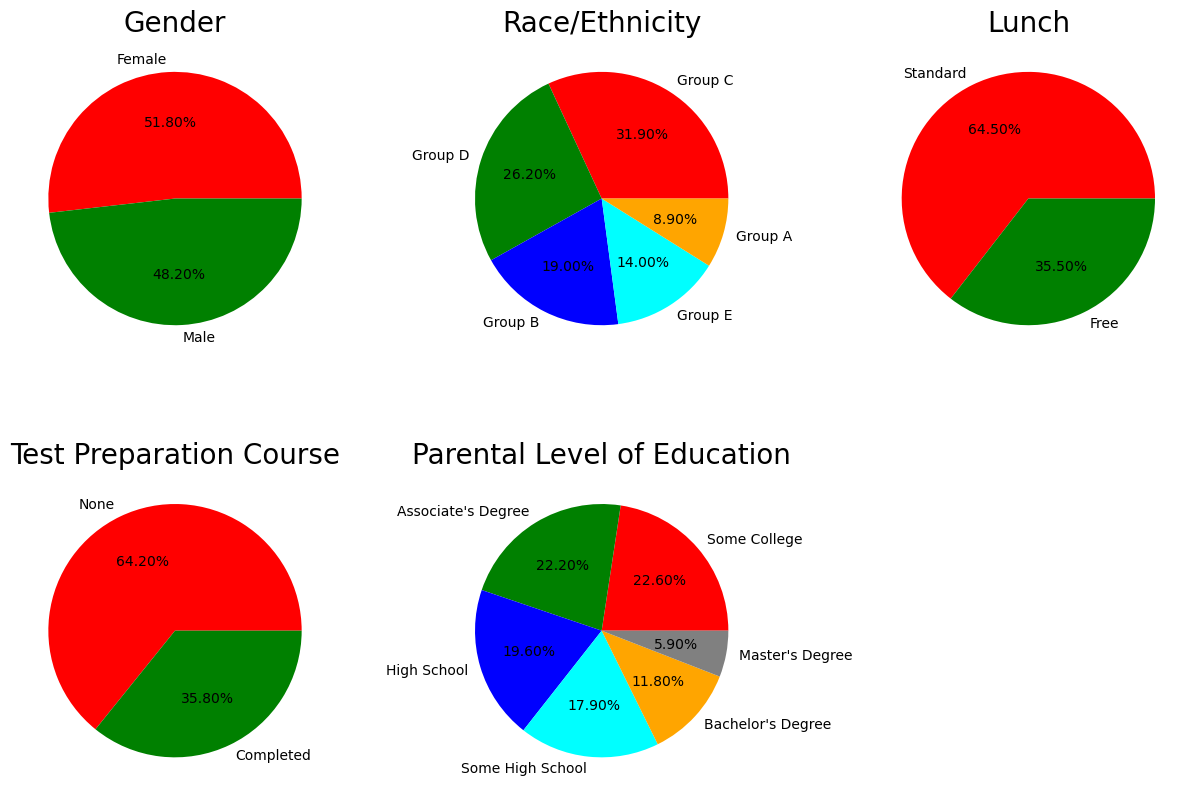

In [36]:
# Set figure size
plt.rcParams['figure.figsize'] = (12, 9)

# Data and labels for pie charts
data_labels = {
    'Gender': {'sizes': df['gender'].value_counts(), 'labels': ['Female', 'Male'], 'colors': ['red', 'green']},
    'Race/Ethnicity': {'sizes': df['race/ethnicity'].value_counts(), 'labels': ['Group C', 'Group D', 'Group B', 'Group E', 'Group A'], 'colors': ['red', 'green', 'blue', 'cyan', 'orange']},
    'Lunch': {'sizes': df['lunch'].value_counts(), 'labels': ['Standard', 'Free'], 'colors': ['red', 'green']},
    'Test Preparation Course': {'sizes': df['test preparation course'].value_counts(), 'labels': ['None', 'Completed'], 'colors': ['red', 'green']},
    'Parental Level of Education': {'sizes': df['parental level of education'].value_counts(), 'labels': ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"], 'colors': ['red', 'green', 'blue', 'cyan', 'orange', 'grey']}
}

# Create subplots for pie charts
for i, (title, data) in enumerate(data_labels.items(), start=1):
    plt.subplot(2, 3, i)
    plt.pie(data['sizes'], colors=data['colors'], labels=data['labels'], autopct='%.2f%%')
    plt.title(title, fontsize=20)

plt.tight_layout()
plt.show()

Insights

The number of Male and Female students is almost equal.
The number of students is higher in Group C.
The number of students who have standard lunch is greater.
The number of students who have not enrolled in any test preparation course is greater.
The number of students whose parental education is “Some College” is greater followed closely by “Associate’s Degree”.

From the above plot, it is clear that all the scores increase linearly with each other.Student’s Performance is related to lunch, race, and parental level education.

Females lead in pass percentage and also are top-scorers.
Student Performance is not much related to test preparation course.
The finishing preparation course is beneficial.

# Maximum Score of Students in All Three Subjects

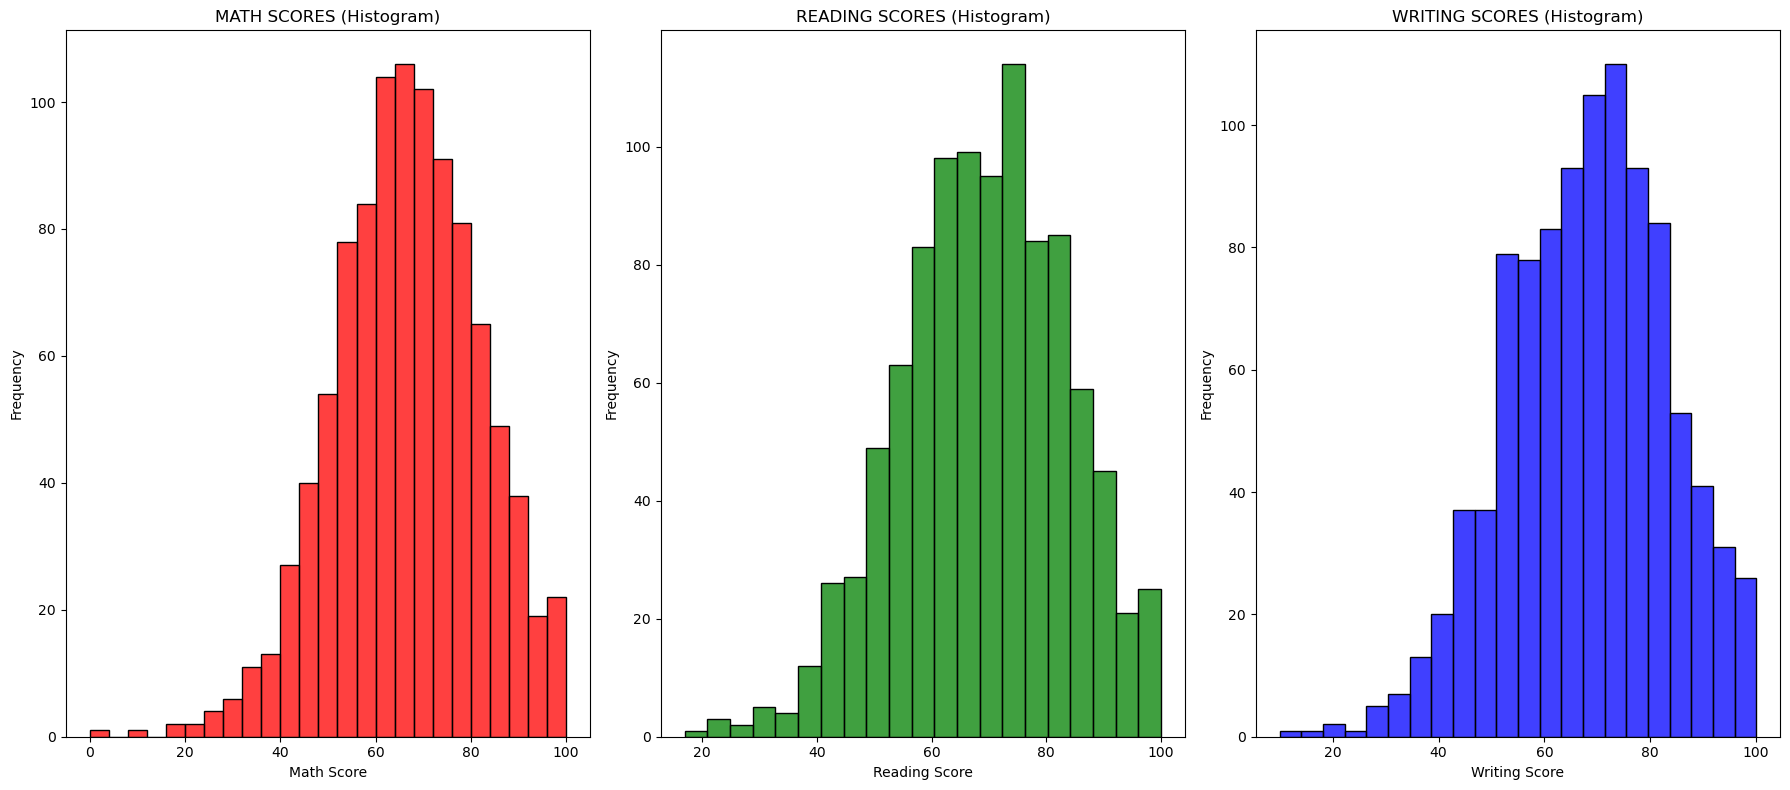

In [40]:
# Set figure size
plt.figure(figsize=(18, 8))

# Histogram for Math Scores
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.histplot(df['math score'], color='red')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

# Histogram for Reading Scores
plt.subplot(1, 3, 2)
plt.title('READING SCORES)')
sns.histplot(df['reading score'], color='green')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

# Histogram for Writing Scores
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.histplot(df['writing score'], color='blue')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Model Training

In [42]:
# Importing libraries
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

# Splitting Data

This separation of the dependent variable(y) and independent variables(X) is one the most important in our project we use the math score as a dependent variable. Because so many students lack in math subjects it will almost 60% to 70% of students in classes 7-10 students are fear of math subjects that’s why I am choosing the math score as a dependent score.

In [43]:
#Splitting the X and Y Variables
X = df.drop(columns="math score", axis=1)
y = df["math score"]

In [44]:
# Create Column Transformer with 3 Types of Transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])

X = preprocessor.fit_transform(X)

In [45]:
#Separate Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(800, 19) (200, 19)


In [46]:
#Create an Evaluate Function for Model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [24]:
# Models Dictionary
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
}

model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    print('=' * 35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Squared Error: 28.3349
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7071
- Mean Squared Error: 32.5710
- Mean Absolute Error: 4.5155
- R2 Score: 0.8555
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2546
- Mean Squared Error: 7.2546
- Mean Absolute Error: 5.6240
- R2 Score: 0.7837


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Squared Error: 0.0781
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.0626
- Mean Squared Error: 8.0626
- Mean Absolut

# Model Selection

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.880433
1,K-Neighbors Regressor,0.783722
2,Decision Tree,0.732862


In linear regression, we got 88.03 curacy in all of the regression models that’s why we choose model.

# Prediction

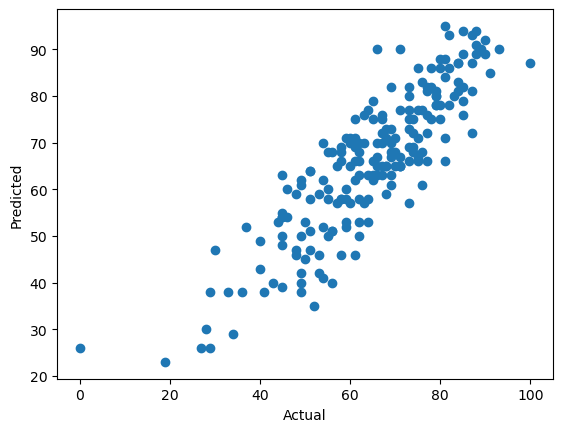

In [26]:
# Generate predictions for the test set
y_pred = model.predict(X_test)

# Plot the scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Difference Between Actual and Predicted Values

In [27]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,85.0,6.0
737,53,42.0,11.0
740,80,75.0,5.0
660,74,75.0,-1.0
411,84,81.0,3.0
...,...,...,...
408,52,35.0,17.0
332,62,70.0,-8.0
208,74,72.0,2.0
613,65,66.0,-1.0


# Conclusion

Using regression algorithms, this project identified Linear Regression as the best predictor for student performance, achieving an outstanding 88% accuracy. Its selection emphasizes its superior predictive ability, suggesting potential applications in improving educational strategies for better student outcomes.

Key Insights:

Student performance prediction is crucial for educational institutions.                                                       Linear Regression outperforms other regression models in accuracy.
With an accuracy of 88%, Linear Regression provides the most reliable predictions.